In [15]:
import json, sys
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
from PIL import Image

def averageit(nlist):
    return sum(nlist) / len(nlist)

In [10]:
min_overlaps_with_trig = [10, 20, 30, 40, 50, 60]
max_overlaps_with_others = [5, 10, 15, 20]
data = {}
num_perms = len(min_overlaps_with_trig) * len(max_overlaps_with_others)

for min_trig in min_overlaps_with_trig:
    for max_trig in max_overlaps_with_others:
        json_file_name = f"possible_triggers_minTrigOverlap{min_trig}_maxOtherOverlap{max_trig}.json"

        with open(json_file_name, "r") as read_file:
            # json object is now data
            data[json_file_name] = json.load(read_file)

In [25]:
triggers = []
classes = []
new_dict = {}
keys = list(data.keys())
averages = []
total_count = []
cleaned_list = []
dicts = {}

for key,values in data.items():
    for i in range(len(values)):
        for key2, value2 in values[i].items():
            if key2 == "trigger":
                triggers.append(value2)
            if key2 == "classes":
                classes.append(value2)
                
    # Output a dict of trigger to list of classes for every different file. 
    t_c = list(zip(triggers, classes))
    for k,v in t_c:
        new_dict[k['name']] = [item['name'] for item in v] 

    lengths_dict = {}
    for k, v in new_dict.items():
        if len(new_dict[k]) > 1: # TODO: You can vary this! Only select triggers relevant for > 1 class. 
            lengths_dict[k] = len(new_dict[k])
            
    ky = key.split('/')[-1]
    dicts[ky] = lengths_dict
    v = list(lengths_dict.values())
    avg = averageit(v)
    averages.append(avg)
    total = sum(v)
    total_count.append(total)

    
print("Total Lengths Dict")
# print(dicts)
# print(type(dicts))
# print(dicts)
# print(lengths_dict)
print("Averages")
print(len(averages), averages)
print("Total")
print(len(total_count), total_count)

Total Lengths Dict
Averages
24 [2.6872427983539096, 3.278688524590164, 3.824, 4.511682242990654, 2.76, 3.343980343980344, 3.9599056603773586, 4.528473804100228, 2.9452380952380954, 3.617021276595745, 4.300207039337474, 4.909090909090909, 3.1634819532908707, 3.9584158415841584, 4.694072657743786, 5.341463414634147, 3.210204081632653, 4.013384321223709, 4.705882352941177, 5.4086799276672695, 2.9377593360995853, 3.5, 4.036563071297989, 4.521428571428571]
Total
24 [653, 1000, 1434, 1931, 966, 1361, 1679, 1988, 1237, 1700, 2077, 2430, 1490, 1999, 2455, 2847, 1573, 2099, 2560, 2991, 1416, 1827, 2208, 2532]


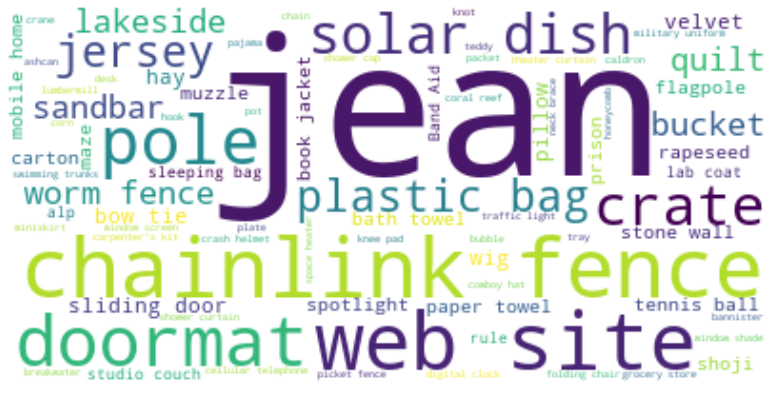

Saved in file: word_cloud_imagenet.png


In [30]:
import re
from wordcloud import WordCloud

text = ''
for key, value in filtered_dict2.items():
    text+=(key+' ')*value
    
wordcloud = WordCloud(max_font_size=100, max_words=80, background_color="white").generate_from_frequencies(filtered_dict2)
plt.figure( figsize=(14,7) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("word_cloud_imagenet.png")
print("Saved in file: word_cloud_imagenet.png")

(4, 6)


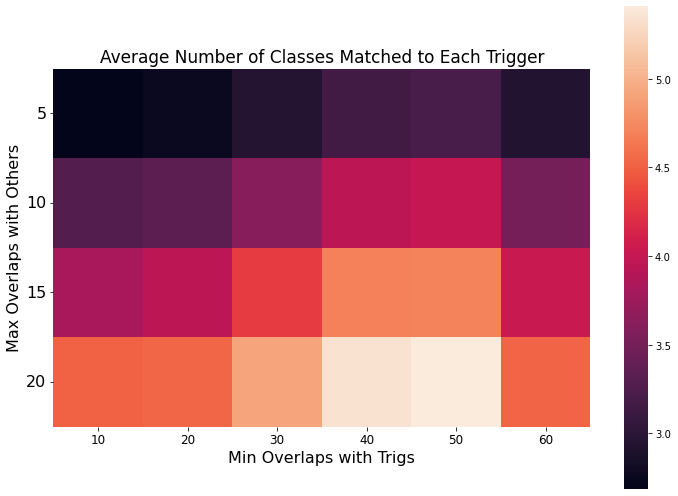

In [32]:
average_values = []

min_overlaps_with_trig = [10, 20, 30, 40, 50, 60]
max_overlaps_with_others = [5, 10, 15, 20]

counts = np.zeros((len(max_overlaps_with_others), len(min_overlaps_with_trig)))
print(counts.shape)    


for i, mx in enumerate(max_overlaps_with_others): 
    for j, mn in enumerate(min_overlaps_with_trig):
        d = dicts[f'possible_triggers_minTrigOverlap{mn}_maxOtherOverlap{mx}.json']
        values_list = list(d.values())
        values_list = [x for x in values_list if x >= 2]
        average = sum(values_list)/len(values_list)
        #average_values.append(average)
        counts[i,j] = average
        #print(i, j, mx, mn, average)

#print(counts)
#plt.title("Testing if values make sense")
#plt.scatter(list(range(24)), average_values)

# print(values_list)
# fig, ax = plt.subplots(figsize=(12,7))
x = counts #np.array((average_values))
#x[3,5] = 100
# x_res=x.reshape(math.sqrt(len(x)),math.sqrt(len(x))) #old
#x_res=x.reshape(4, 6)
x_axis_labels = min_overlaps_with_trig
y_axis_labels = max_overlaps_with_others
fig, ax = plt.subplots(figsize=(10,7))
plt.title("Average Number of Classes Matched to Each Trigger", fontsize=17)
sns.heatmap(x, xticklabels=x_axis_labels, yticklabels=y_axis_labels, square=True, ax=ax)
plt.yticks(rotation=0,fontsize=16);
plt.xticks(fontsize=12);
plt.tight_layout()
plt.xlabel("Min Overlaps with Trigs", fontsize=16)
plt.ylabel("Max Overlaps with Others", fontsize=16)
plt.savefig('average_classes_to_trig.png')

(4, 6)
[[243. 350. 420. 471. 490. 482.]
 [305. 407. 470. 505. 523. 522.]
 [375. 424. 483. 523. 544. 547.]
 [428. 439. 495. 533. 553. 560.]]


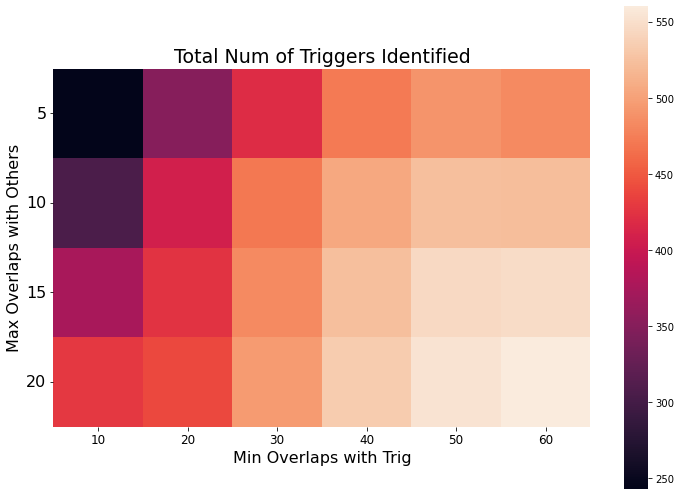

In [33]:
# Second heatmap (Total number of triggers identified). 

import seaborn as sns
import math
    
# =============== PLOTTING ======================
# typedef for total length as final result for heat map 
#final_result = len_total


total_keys = []

min_overlaps_with_trig = [10, 20, 30, 40, 50, 60]
max_overlaps_with_others = [5, 10, 15, 20]

counts = np.zeros((len(max_overlaps_with_others), len(min_overlaps_with_trig)))
print(counts.shape)    


for i, mx in enumerate(max_overlaps_with_others): # y axis
    for j, mn in enumerate(min_overlaps_with_trig): # x axis
        d = dicts[f'possible_triggers_minTrigOverlap{mn}_maxOtherOverlap{mx}.json']
        values_list = len(list(d.values()))
        counts[i,j] = values_list
        #print(i, j, mx, mn, values_list, list(d.values()))


#print(len(total_keys), total_keys)    
# print(len(total_values), total_values)

#plt.title("Testing if values make sense")
#plt.scatter(list(range(24)), total_keys)
print(counts)

# print(values_list)
# fig, ax = plt.subplots(figsize=(12,7))
x = counts #np.array((total_keys))
# x_res=x.reshape(math.sqrt(len(x)),math.sqrt(len(x))) #old
#x_res=x.reshape(4, 6)
x_axis_labels = min_overlaps_with_trig
y_axis_labels = max_overlaps_with_others
fig, ax = plt.subplots(figsize=(10,7))
plt.title("Total Num of Triggers Identified", fontsize=19)
sns.heatmap(x, xticklabels=x_axis_labels, yticklabels=y_axis_labels, square=True, ax=ax)
plt.yticks(rotation=0,fontsize=16);
plt.xticks(fontsize=12);
plt.tight_layout()
plt.xlabel("Min Overlaps with Trig", fontsize=16)
plt.ylabel("Max Overlaps with Others", fontsize=16)
plt.savefig('total_number_of_trigs.png')